For details on what the tsv files in the Unsplash dataset contain, check [this link](https://github.com/unsplash/datasets/blob/master/DOCS.md)

In [1]:
cd ..

/home/xavi/projects/image-search


/home/xavi/projects/image-search/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd

## 1 - photos.tsv

The `photos.tsv` dataset has one row per photo. It contains properties of the photo, the name of the contributor, the image URL, and overall stats.

| Field                       | Description |
|-----------------------------|-------------|
| photo_id                       | ID of the Unsplash photo |
| photo_url                      | Permalink URL to the photo page on unsplash.com |
| photo_image_url                | URL of the image file. Note: this is a [dynamic URL](https://unsplash.com/documentation#dynamically-resizable-images), so you can apply [resizing and customization operations directly on the image](https://unsplash.com/documentation#supported-parameters) |
| photo_submitted_at             | Timestamp of when the photo was submitted to Unsplash |
| photo_featured                 | Whether the photo was promoted to the [Editorial feed](https://unsplash.com/) or not |
| photo_width                    | Width of the photo in pixels |
| photo_height                   | Height of the photo in pixels |
| photo_aspect_ratio             | Aspect ratio of the photo |
| photo_description              | Description of the photo written by the photographer |
| photographer_username          | Username of the photographer on Unsplash |
| photographer_first_name        | First name of the photographer |
| photographer_last_name         | Last name of the photographer |
| exif_camera_make               | Camera make (brand) extracted from the EXIF data |
| exif_camera_model              | Camera model extracted from the EXIF data |
| exif_iso                       | ISO setting of the camera, extracted from the EXIF data |
| exif_aperture_value            | Aperture setting of the camera, extracted from the EXIF data |
| exif_focal_length              | Focal length setting of the camera, extracted from the EXIF data |
| exif_exposure_time             | Exposure time setting of the camera, extracted from the EXIF data |
| photo_location_name            | Location of the photo |
| photo_location_latitude        | Latitude of the photo |
| photo_location_longitude       | Longitude of the photo |
| photo_location_country         | Country where the photo was made |
| photo_location_city            | City where the photo was made |
| stats_views                    | Total # of times that a photo has been viewed on the Unsplash platform |
| stats_downloads                | Total # of times that a photo has been downloaded via the Unsplash platform |
| ai_description                 | Textual description of the photo, generated by a 3rd party AI |
| ai_primary_landmark_name       | Landmark present in the photo, generated by a 3rd party AI |
| ai_primary_landmark_latitude   | Latitude of the landmark, generated by a 3rd party AI |
| ai_primary_landmark_longitude  | Longitude of the landmark, generated by a 3rd party AI |
| ai_primary_landmark_confidence | Landmark confidence of the 3rd party AI |
| blur_hash                      | [BlurHash](https://blurha.sh/) hash of the photo |

In [3]:
photos = pd.read_csv("./data/unsplash-research-dataset-lite-latest/photos.tsv000", sep='\t', header=0)

In [4]:
photos.head()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
0,wud-eV6Vpwo,https://unsplash.com/photos/wud-eV6Vpwo,https://images.unsplash.com/photo-143924685475...,2015-08-10 22:48:30.841999,t,4273,2392,1.79,NaN,sergio_rola,...,NaN,NaN,7515660,42055,silhouette of structure under red sky,NaN,NaN,NaN,NaN,LJMymdi{1IWo}Gj[w^WVICS#bbS2
1,psIMdj26lgw,https://unsplash.com/photos/psIMdj26lgw,https://images.unsplash.com/photo-144077331099...,2015-08-28 14:49:40.016052,t,3872,2176,1.78,NaN,xcvii,...,NaN,NaN,1814817,5893,selective focus photography of black animal ne...,NaN,NaN,NaN,NaN,"LKKd}R^,bJD%~q4Txu%N%gxuD$xu"
2,2EDjes2hlZo,https://unsplash.com/photos/2EDjes2hlZo,https://images.unsplash.com/photo-144683489809...,2015-11-06 18:36:17.334458,t,2560,1707,1.50,Sunset reflection over river,imthinhvu,...,NaN,NaN,2708347,12420,photo of body body of water during golden hour,NaN,NaN,NaN,NaN,LeI{]g9u9u%1?KV@s8R-EAf#t5aL
3,WN8kSLy8KMQ,https://unsplash.com/photos/WN8kSLy8KMQ,https://images.unsplash.com/photo-144530812443...,2015-10-20 02:29:20.267471,t,2288,1520,1.51,Hiking The Mountains,bettenz,...,NaN,NaN,1616448,9773,green leafed trees between two rock formations,Zion National Park,37.250981,-112.950525,65.07215,LoDv=$sjD$bc.AV@ROWCtSn~s:Rj
4,QAXDmkU60OU,https://unsplash.com/photos/QAXDmkU60OU,https://images.unsplash.com/photo-144196149785...,2015-09-11 08:51:54.202624,t,2048,1371,1.49,NaN,j,...,NaN,NaN,983884,9410,landscape photography of snow covered mountain...,NaN,NaN,NaN,NaN,LUIPMT9F%LoIBax]Rkj]Aet7Rjj[


In [5]:
len(photos)

25000

In [6]:
photos["photo_description"].isna().mean()

0.56276

## 2 - keywords.tsv

The `keywords.tsv` dataset has one row per photo-keyword pair. It contains data
about how a keyword is connected to a photo and the conversions of the photo our search engine for a particular keyword.

| Field                         | Description |
|-------------------------------|-------------|
| photo_id                      | ID of the Unsplash photo |
| keyword                       | Keyword or search term |
| ai_service_1_confidence       | Confidence for the keyword from a 3rd party AI (0-100)|
| ai_service_2_confidence       | Confidence for the keyword from another 3rd party AI (0-100)|
| suggested_by_user             | Whether the keyword was added by a user (human) |

In [7]:
keywords = pd.read_csv("./data/unsplash-research-dataset-lite-latest/keywords.tsv000", sep='\t', header=0)

In [8]:
keywords.head(3)

,photo_id,keyword,ai_service_1_confidence,ai_service_2_confidence,suggested_by_user
0,zzux2cH-F-A,flower,81.635406,NaN,f
1,zzux2cH-F-A,forest,99.837990,0.935093,f
2,zzux2cH-F-A,farm,50.837982,NaN,f


In [22]:
keyword_counts = keywords["keyword"].value_counts()
keyword_counts.describe(percentiles=[0.25, 0.5, 0.75, 0.9])

count    28555.000000
mean        93.365470
std        626.218463
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
90%         44.000000
max      20224.000000
Name: count, dtype: float64

In [28]:
keywords[["ai_service_1_confidence", "ai_service_2_confidence"]].describe(percentiles=[0.25, 0.5, 0.75, 0.9]).round(3)

,ai_service_1_confidence,ai_service_2_confidence
count,2355392.000,217546.000
mean,35.068,16.690
std,20.284,33.225
min,10.000,0.500
25%,22.857,0.809
50%,28.959,0.910
75%,38.672,0.978
90%,60.822,87.421
max,100.000,99.494


In [11]:
keywords["photo_id"].value_counts().describe()

count    25000.00000
mean       106.64204
std         57.75203
min          8.00000
25%         71.00000
50%        125.00000
75%        133.00000
max       1042.00000
Name: count, dtype: float64

### Conclusions
- Tags
    - Most photos have **dozens of keywords** (very complete info!)
    - The vast majority of the tags (>50%) appear ONLY ONCE.
    - Very few tags appear 100s of times, while others just a handful
        - For common tags: Using embeddings might be useful
        - For uncommon tags: Semantic embeddings might work better
- AI evaluation:
    - In terms of evaluation score, the **service 1** tends to be more restrictive, while **service 2** tends to be more optimistic.
    - Also, for some reason **there are values from 0 to 1 and from 0 to 100 mixed** on **service 2**.

## 3 - collections.tsv

*Note: A collection on Unsplash is a user created grouping of photos. These are similar to boards on Pinterest and can often group photos in complex and creative ways.*

The `collections.tsv` dataset has one row per photo-collection pair. Whenever a photo
belongs to a collection created by a user, it will appear as one row. Each row describes
when the photo was added to the collection and gives the title of the collection.

| Field                         | Description |
|-------------------------------|-------------|
| photo_id                      | ID of the Unsplash photo |
| collection_id                 | ID of the Unsplash collection containing the photo |
| collection_title              | Title of the collection containing the photo |
| photo_collected_at            | Timestamp of when the photo was added to the collection |

In [44]:
collections = pd.read_csv("./data/unsplash-research-dataset-lite-latest/collections.tsv000", sep='\t', header=0)

In [47]:
collections["photo_collected_at"] = pd.to_datetime(collections["photo_collected_at"], format="ISO8601")

In [48]:
collections.head(3)

,photo_id,collection_id,collection_title,photo_collected_at
0,--2IBUMom1I,3734077,Images,2018-12-30 00:56:45.223252
1,--2IBUMom1I,162470,Majestical Sunsets,2016-03-15 17:04:25.089589
2,--2IBUMom1I,9832457,business,2020-04-04 14:26:10.506402


In [36]:
collections["collection_id"].value_counts().describe()

count    606940.000000
mean          3.949071
std          13.760808
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        5918.000000
Name: count, dtype: float64

In [51]:
collections["photo_collected_at"].describe()

count                          2396849
mean     2019-06-03 08:50:30.439617536
min                2013-06-10 00:00:00
25%      2018-02-24 01:07:43.277793024
50%      2019-05-24 21:37:36.197780992
75%      2020-06-12 13:40:45.002514944
max         2023-04-30 10:43:40.946065
Name: photo_collected_at, dtype: object

### Conclusions
- Most collections contain only one photo
- Photos seems to be more or less constantly distributed over time.

## 4 - conversions.tsv

*Note: a conversion is currently defined as a user selecting an image to download it.*

The `conversions.tsv` dataset has one row per search conversion. The dataset tells you which photo has been downloaded for a search, the country of origin, and an anonymous identifier to indiciate the unique users. The data goes back up to 1 year before the release of each version of the dataset.

| Field                         | Description |
|-------------------------------|-------------|
| converted_at                  | Timestamp of the conversion event |
| conversion_type               | Type of conversion (`download` only for now) |
| keyword                       | Keyword that was searched and led to the conversion |
| photo_id                      | Photo ID of the photo that converted |
| anonymous_user_id             | Anonymous user ID |
| conversion_country            | Country code of the device geolocation |

In [69]:
conversions = pd.read_csv("./data/unsplash-research-dataset-lite-latest/conversions.tsv000", sep='\t', header=0)

In [70]:
conversions.head(3)

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
0,2022-12-01 00:29:12.239,download,bluebird,UsWjYe1FdlU,f9e3b04d-e9f1-4cfc-b966-f9d3fffaaf6c,BR
1,2022-12-01 00:47:29.394,download,textures jellyfish,wVG8CCQ20A0,f6caa123-3a55-452a-a4c7-882a110dcdb5,UA
2,2022-12-01 00:51:58.826,download,textures jellyfish,-ufym5Rdqs4,f6caa123-3a55-452a-a4c7-882a110dcdb5,UA


In [71]:
len(conversions)

9695633

In [72]:
conversions["conversion_type"].unique()

array(['download'], dtype=object)

In [82]:
country_conversion = conversions["conversion_country"].value_counts(normalize=True)

In [88]:
country_conversion.cumsum()[:20]

conversion_country
US    0.179672
IN    0.296082
KR    0.338235
GB    0.379712
DE    0.414432
CN    0.447606
CA    0.478043
ID    0.506695
FR    0.534853
BR    0.559042
RU    0.580912
PK    0.602552
AU    0.622625
IT    0.642083
ES    0.660803
JP    0.678131
PH    0.693203
MX    0.707270
NL    0.721231
BD    0.735082
Name: proportion, dtype: float64

In [76]:
conversions["anonymous_user_id"].value_counts().describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count    4.632198e+06
mean     2.093096e+00
std      4.724443e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
90%      4.000000e+00
95%      6.000000e+00
max      4.095000e+03
Name: count, dtype: float64

In [108]:
keyword_conversion = conversions["keyword"].value_counts(normalize=True).cumsum()
keyword_conversion[:1000]

keyword
nature             0.037911
sky                0.053759
sea                0.066039
mountain           0.077847
forest             0.088478
                     ...   
mountain forest    0.652888
oled wallpaper     0.652986
colours            0.653084
black dog          0.653183
dog treats         0.653281
Name: proportion, Length: 1000, dtype: float64

<Axes: >

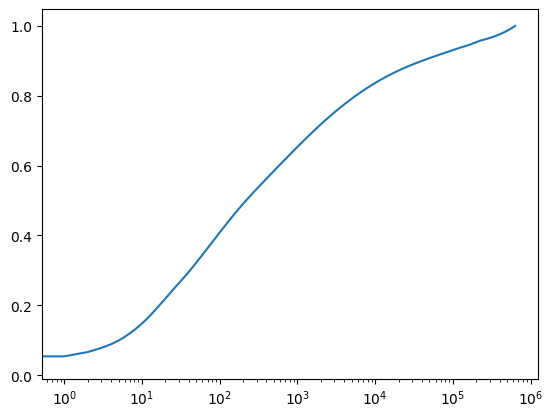

In [110]:
keyword_conversion.reset_index(drop=True).plot(logx=True)

### Conclusions
- The vast majority of users only convert once, therefore it's reasonable to think that making recommendations for specific users might yield very low additional performance.
- The **top 20 countries** correspond to almost 75% of interactions.
- The top keywords conversion yield a somewhat-logarithmic curve:
    - Top 10 -> 13%
    - Top 100 -> 40%
    - Top 1000 -> 65%
    - Top 1000 -> 83% 

## 5 - colors.tsv

*Note: The coverage and score data comes from a 3rd party AI*

The `colors.tsv` dataset has one row per major color present in the photo. The dataset tells which colors are contained within a photo, their coverage as a percentage, and a score for how in focus the color is.

| Field                     | Description |
|---------------------------|-------------|
| photo_id                  | ID of the Unsplash photo |
| hex                       | Hexadecimal representation of the color |
| red                       | Red component of the photo in the RGB system |
| green                     | Green component of the photo in the RGB system |
| blue                      | Blue component of the photo in the RGB system |
| keyword                   | Name of the closest color as a [CSS color keyword](https://www.w3schools.com/cssref/css_colors.asp) |
| coverage                  | Pixel coverage of the color as a percentage |
| score                     | Score of the color in the photo (including the notion of focus) |

In [52]:
colors = pd.read_csv("./data/unsplash-research-dataset-lite-latest/colors.tsv000", sep='\t', header=0)

In [53]:
colors.head()

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
0,5bigFVA8nDo,C4B1F7,196,177,247,lightsteelblue,0.006933,0.007985
1,5bigFVA8nDo,7A3A6A,122,58,106,dimgray,0.014400,0.003312
2,9Jtvio08V84,675145,103,81,69,darkolivegreen,0.074067,0.177135
3,b95kjjjjhHw,789FD5,120,159,213,cornflowerblue,0.003400,0.078048
4,b95kjjjjhHw,4579AF,69,121,175,steelblue,0.002600,0.049575


In [63]:
x = colors[colors["photo_id"]=="_0vH4E1YYsY"]
x

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
137412,_0vH4E1YYsY,B89B84,184,155,132,rosybrown,0.005067,0.034003
142894,_0vH4E1YYsY,7E7A7C,126,122,124,gray,0.059667,0.029373
157682,_0vH4E1YYsY,9E9A9E,158,154,158,darkgray,0.153133,0.079596
157683,_0vH4E1YYsY,CCB09E,204,176,158,tan,0.007200,0.029366
166880,_0vH4E1YYsY,17181E,23,24,30,black,0.024400,0.032880
166881,_0vH4E1YYsY,A77461,167,116,97,indianred,0.014867,0.121174
167431,_0vH4E1YYsY,2F3035,47,48,53,darkslategray,0.018467,0.031497
186188,_0vH4E1YYsY,C3C2C9,195,194,201,silver,0.120133,0.121295
186189,_0vH4E1YYsY,D5B0A1,213,176,161,tan,0.024800,0.120851
191302,_0vH4E1YYsY,BE9484,190,148,132,rosybrown,0.042133,0.302929


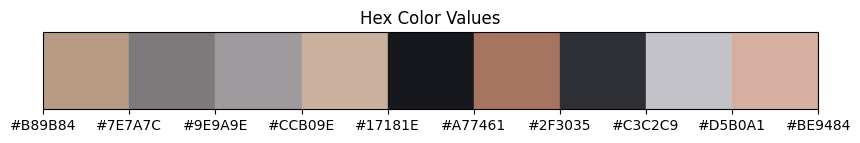

In [64]:
import matplotlib.pyplot as plt

# Replace these hex color values with your own
hex_colors = ["#" + code for code in x["hex"]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(len(hex_colors), 1))

# Plot each hex color as a rectangle
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set the x-axis labels to be the hex color values
ax.set_xticks(range(len(hex_colors)))
ax.set_xticklabels(hex_colors)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Set plot title and show the plot
plt.title('Hex Color Values')
plt.show()